## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
path_bitstamp = Path("../crypto_arbitrage/Resources/bitstamp.csv")
bitstamp = pd.read_csv(path_bitstamp,
    index_col='Timestamp',     
    parse_dates=True, 
    infer_datetime_format=True,
    header=0)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(5), bitstamp.tail(5)

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
 2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
 2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
 2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
 2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  45482.128785    13639.647479  
 2018-01-01 00:01:00  36361.390888    13653.332816  
 2018-01-01 00:02:00   1152.144036    13610.136247  
 2018-01-01 00:03:00  97856.416478    13623.361128  
 2018-01-01 00:04:00  14582.660932    13632.923329  ,
                         Open     High      Low     Close  BTC Volume  \
 Timestamp    

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [6]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
path_coinbase = Path("../crypto_arbitrage/Resources/coinbase.csv")
coinbase = pd.read_csv(path_coinbase,
    index_col='Timestamp',     
    parse_dates=True, 
    infer_datetime_format=True,
    header=0)

In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(5), coinbase.head(5)

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
 2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
 2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
 2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
 2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  283451.08537    13619.105106  
 2018-01-01 00:01:00  183283.97801    13602.426919  
 2018-01-01 00:02:00  156789.19686    13590.872506  
 2018-01-01 00:03:00  221413.64182    13560.332806  
 2018-01-01 00:04:00  135141.26944    13574.719401  ,
                          Open      High       Low      Close  BTC Volume  \
 Timestamp

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp=bitstamp.fillna(0).copy()

In [9]:
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [12]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

/Users/alphonsologan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [18]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.loc[:, "Close"].dtypes

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [19]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [20]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
path_coinbase = Path("../crypto_arbitrage/Resources/coinbase.csv")
coinbase = pd.read_csv(path_coinbase,
    index_col='Timestamp',     
    parse_dates=True, 
    infer_datetime_format=True,
    header=0)

In [21]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase=coinbase.fillna(0).copy()
bitstamp.isnull().sum()

In [23]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

/Users/alphonsologan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [46]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [48]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [49]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [50]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

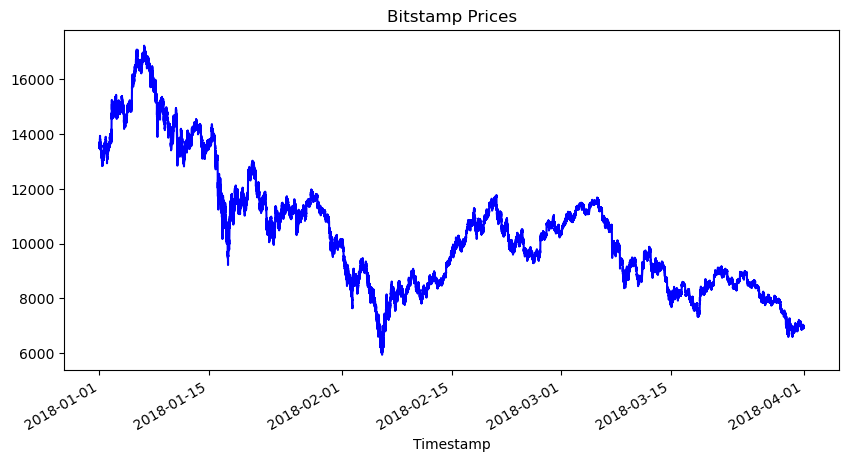

In [61]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), title="Bitstamp Prices", color="blue")

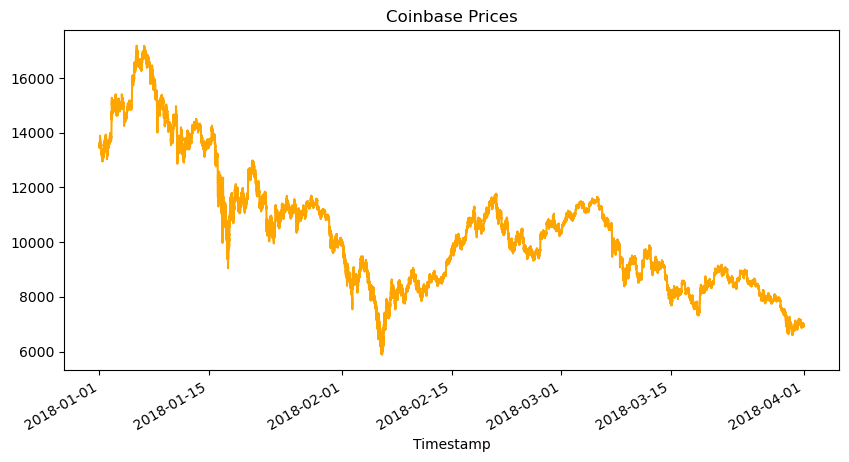

In [62]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase Prices", color="orange")

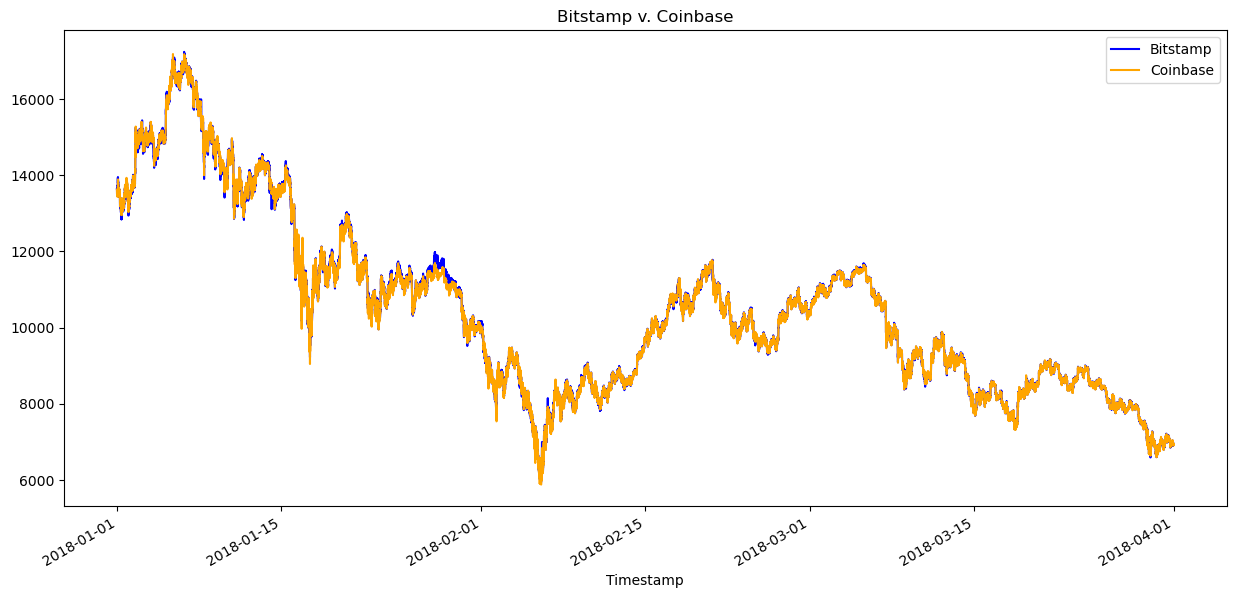

In [63]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

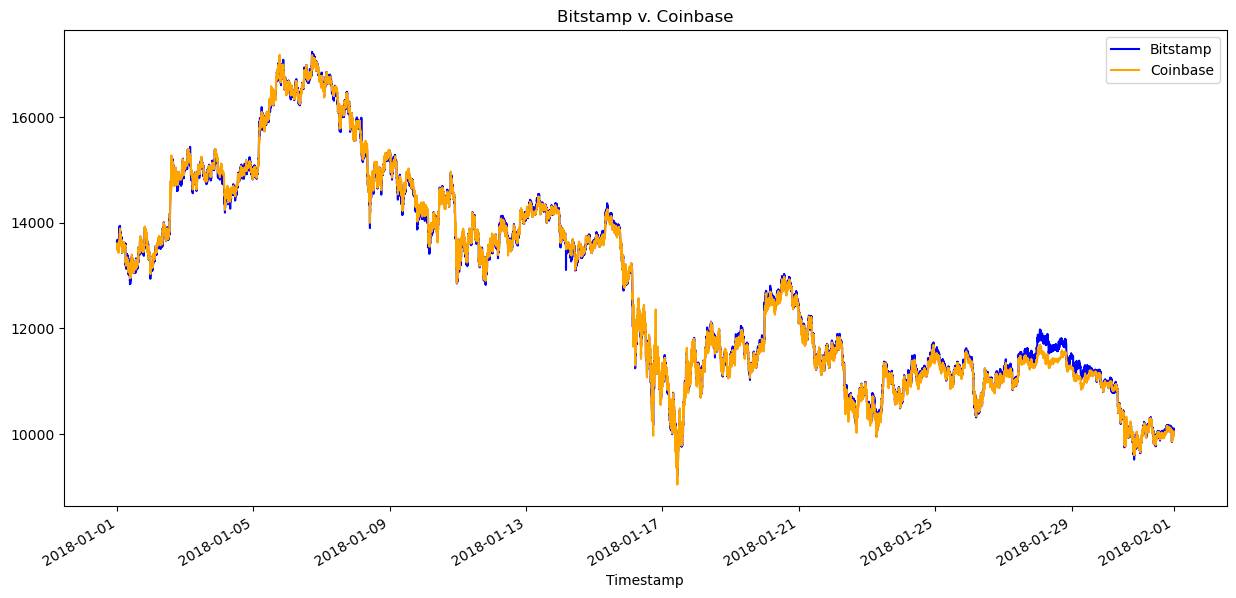

In [65]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

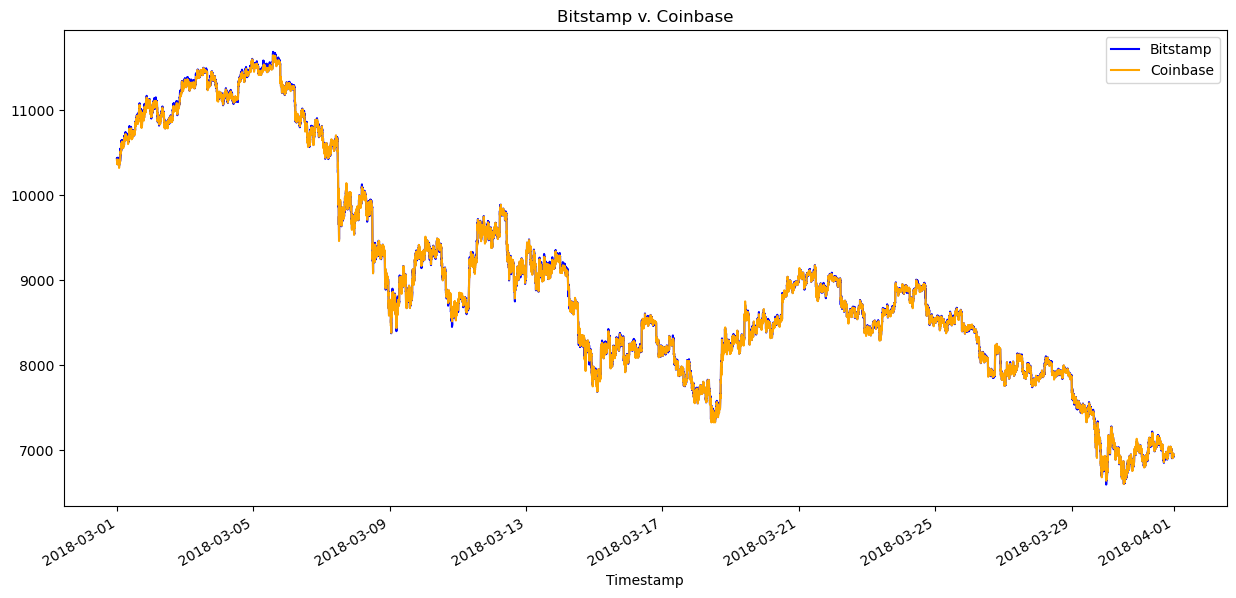

In [66]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the degree of spread decreased between Jan 2018 and March 2018.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [164]:
# three dates to evaluate (early_date, middle_date, late_date)
early_date = '2018-01-20'
middle_date = '2018-02-23'
late_date = '2018-03-29'

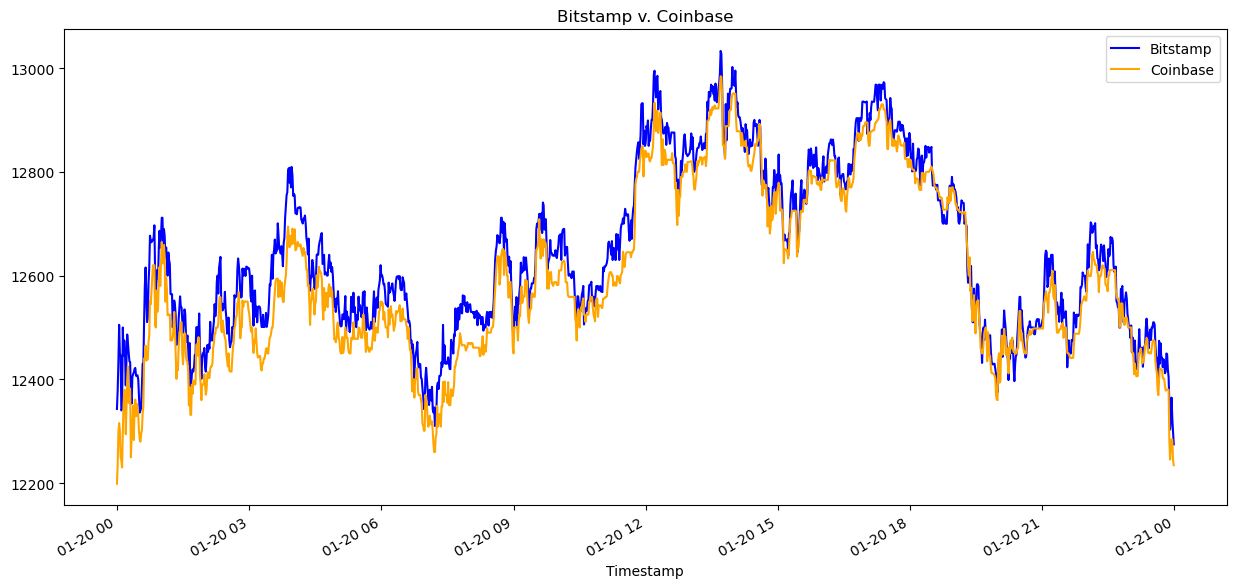

In [165]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[early_date].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc[early_date].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [166]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc[early_date] - coinbase_sliced.loc[early_date]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1437.000000
mean       42.888163
std        29.990035
min       -56.350000
25%        24.280000
50%        41.460000
75%        60.020000
max       200.500000
Name: Close, dtype: float64

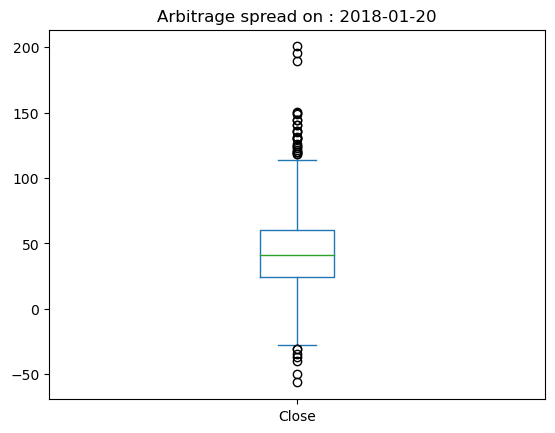

In [167]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title=f"Arbitrage spread on : {early_date}");

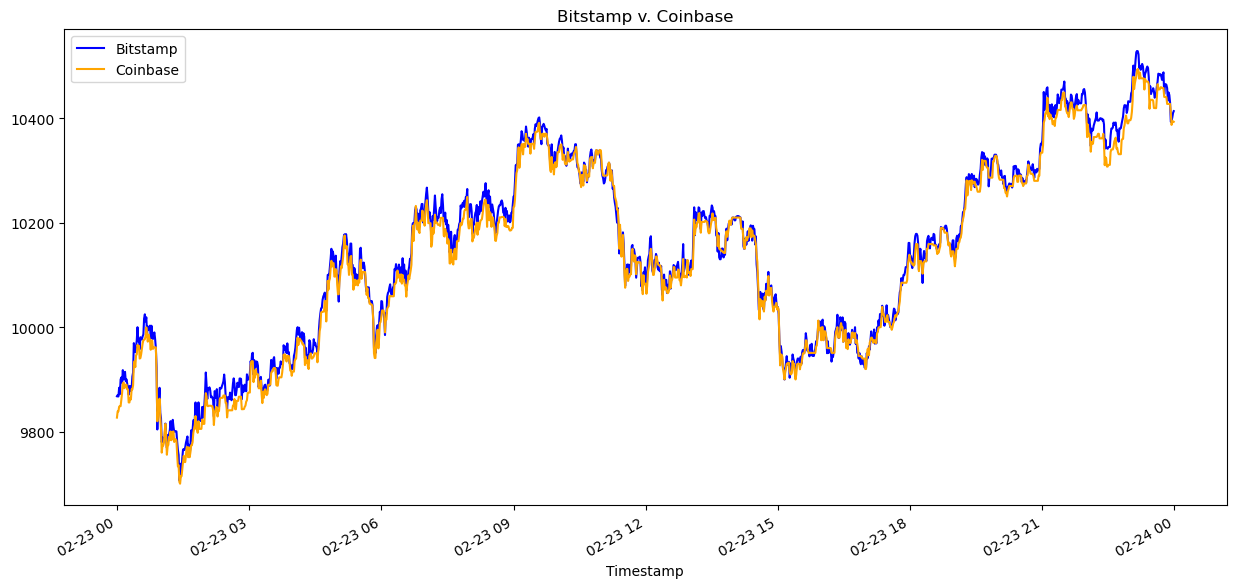

In [168]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[middle_date].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc[middle_date].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [169]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc[middle_date] - coinbase_sliced.loc[middle_date]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean       13.835741
std        12.897678
min       -25.000000
25%         5.020000
50%        13.740000
75%        22.650000
max        59.010000
Name: Close, dtype: float64

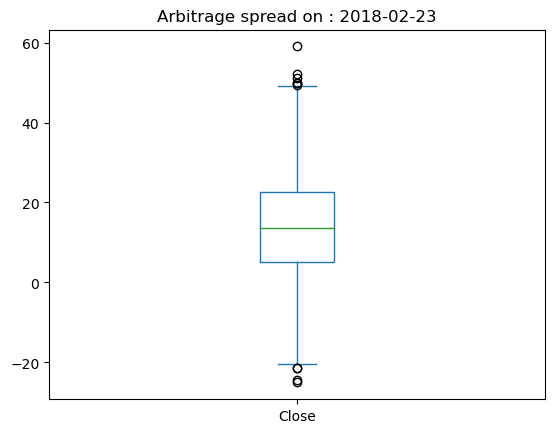

In [170]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title=f"Arbitrage spread on : {middle_date}");

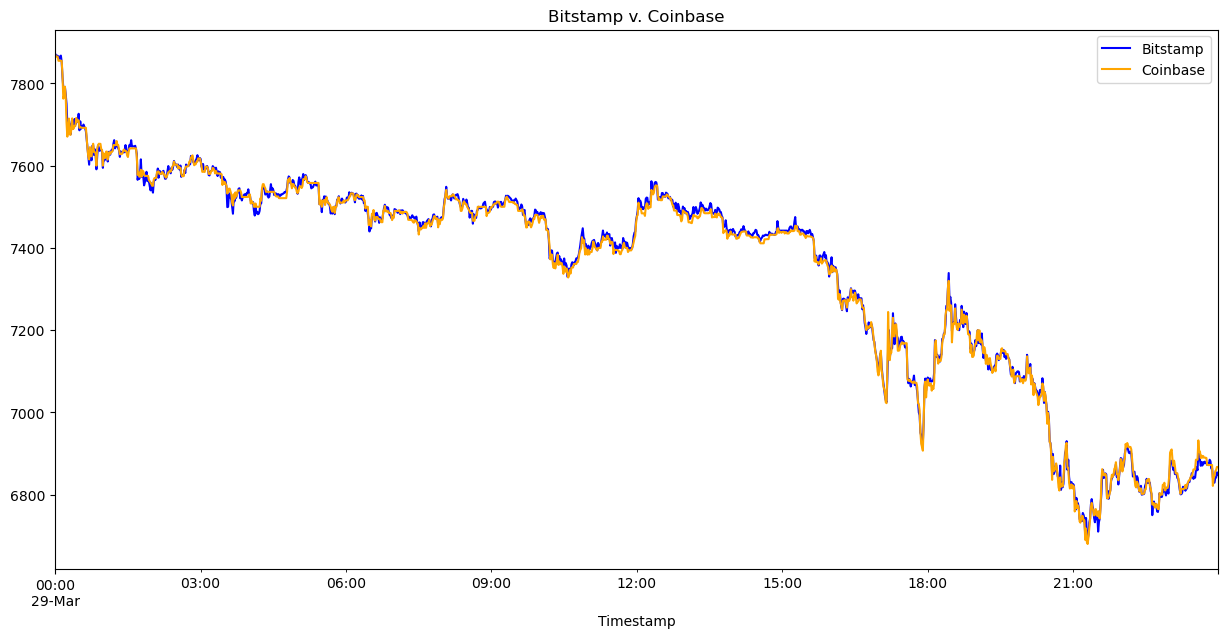

In [171]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[late_date].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc[late_date].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [172]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc[late_date] - coinbase_sliced.loc[late_date]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

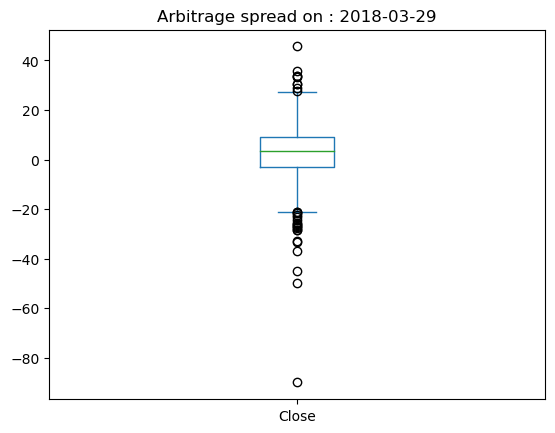

In [173]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title=f"Arbitrage spread on : {late_date}");

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [174]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early= bitstamp_sliced.loc[early_date] - coinbase_sliced.loc[early_date]
arbitrage_spread_middle = bitstamp_sliced.loc[middle_date] - coinbase_sliced.loc[middle_date]
arbitrage_spread_late = bitstamp_sliced.loc[late_date] - coinbase_sliced.loc[late_date]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print(f"Summary statistics for arbitrage_spread_early on {early_date}:")
print(arbitrage_spread_early[arbitrage_spread_early > 0].describe())
print("")
print(f"Summary statistics for arbitrage_spread_middle on {middle_date}:")
print(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())
print("")
print(f"Summary statistics for arbitrage_spread_late on {late_date}:")
print(arbitrage_spread_late[arbitrage_spread_late > 0].describe())

Summary statistics for arbitrage_spread_early on 2018-01-20:
count    1336.000000
mean       47.114326
std        26.531471
min         0.050000
25%        28.725000
50%        44.045000
75%        61.145000
max       200.500000
Name: Close, dtype: float64

Summary statistics for arbitrage_spread_middle on 2018-02-23:
count    1247.000000
mean       16.993601
std        10.536648
min         0.040000
25%         8.660000
50%        15.920000
75%        24.010000
max        59.010000
Name: Close, dtype: float64

Summary statistics for arbitrage_spread_late on 2018-03-29:
count    935.000000
mean       8.340182
std        5.946176
min        0.010000
25%        3.945000
50%        7.420000
75%       11.365000
max       45.600000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [175]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0]/ coinbase_sliced.loc[early_date]
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]/ coinbase_sliced.loc[middle_date]
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0]/ coinbase_sliced.loc[late_date]

# Review the spread return DataFrame
print(f"Spread return early on {early_date}:")
display(spread_return_early.head(10))
print("")
print(f"Spread return middle on {middle_date}:")
display(spread_return_middle.head(10))
print("")
print(f"Spread return late on {late_date}:")
display(spread_return_late.head(10))

Spread return early on 2018-01-20:


Timestamp
2018-01-20 00:00:00    0.011805
2018-01-20 00:01:00    0.011764
2018-01-20 00:02:00    0.011053
2018-01-20 00:03:00    0.015374
2018-01-20 00:04:00    0.012193
2018-01-20 00:05:00    0.015973
2018-01-20 00:06:00    0.007828
2018-01-20 00:07:00    0.009206
2018-01-20 00:08:00    0.016301
2018-01-20 00:09:00    0.007786
Name: Close, dtype: float64


Spread return middle on 2018-02-23:


Timestamp
2018-02-23 00:00:00    0.004154
2018-02-23 00:01:00    0.003159
2018-02-23 00:02:00    0.002890
2018-02-23 00:03:00    0.003668
2018-02-23 00:04:00    0.002330
2018-02-23 00:05:00    0.005185
2018-02-23 00:06:00    0.004234
2018-02-23 00:07:00    0.002015
2018-02-23 00:08:00    0.002689
2018-02-23 00:09:00    0.000562
Name: Close, dtype: float64


Spread return late on 2018-03-29:


Timestamp
2018-03-29 00:00:00    0.000186
2018-03-29 00:01:00    0.000498
2018-03-29 00:02:00    0.000282
2018-03-29 00:03:00    0.000285
2018-03-29 00:04:00    0.001218
2018-03-29 00:05:00    0.000634
2018-03-29 00:06:00    0.001324
2018-03-29 00:07:00    0.001603
2018-03-29 00:08:00         NaN
2018-03-29 00:09:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [181]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
print(f"Profitable trades early on {early_date}:")
display(spread_return_early.head())
print("")
print(f"Profitable trades middle on {middle_date}:")
display(spread_return_middle.head())
print("")
print(f"Profitable trades late on {late_date}:")
display(spread_return_late.head())

Profitable trades early on 2018-01-20:


Timestamp
2018-01-20 00:00:00    0.011805
2018-01-20 00:01:00    0.011764
2018-01-20 00:02:00    0.011053
2018-01-20 00:03:00    0.015374
2018-01-20 00:04:00    0.012193
Name: Close, dtype: float64


Profitable trades middle on 2018-02-23:


Timestamp
2018-02-23 00:00:00    0.004154
2018-02-23 00:01:00    0.003159
2018-02-23 00:02:00    0.002890
2018-02-23 00:03:00    0.003668
2018-02-23 00:04:00    0.002330
Name: Close, dtype: float64


Profitable trades late on 2018-03-29:


Timestamp
2018-03-29 00:00:00    0.000186
2018-03-29 00:01:00    0.000498
2018-03-29 00:02:00    0.000282
2018-03-29 00:03:00    0.000285
2018-03-29 00:04:00    0.001218
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [177]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
print(f"Summary statistics early on {early_date}:")
display(profitable_trades_early.describe())
print("")
print(f"Summary statistics middle on {middle_date}:")
display(profitable_trades_middle.describe())
print("")
print(f"Summary statistics late on {late_date}:")
display(profitable_trades_late.describe())

Summary statistics early on 2018-01-20:


count    19.000000
mean      0.011797
std       0.001942
min       0.010001
25%       0.010537
50%       0.011231
75%       0.011948
max       0.016301
Name: Close, dtype: float64


Summary statistics middle on 2018-02-23:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Summary statistics late on 2018-03-29:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [178]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc[early_date]
profit_middle = profitable_trades_middle * coinbase_sliced.loc[middle_date]
profit_late = profitable_trades_late * coinbase_sliced.loc[late_date]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
print(f"Profit per trade early on: {early_date}")
display(profit_per_trade_early.head())
print("")
print(f"Profit per trade middle on: {middle_date}")
display(profit_per_trade_middle.head())
print("")
print(f"Profit per trade late on: {late_date}")
display(profit_per_trade_late.head())

Profit per trade early on: 2018-01-20


Timestamp
2018-01-20 00:00:00    144.01
2018-01-20 00:01:00    143.93
2018-01-20 00:02:00    135.93
2018-01-20 00:03:00    189.34
2018-01-20 00:04:00    149.98
Name: Close, dtype: float64


Profit per trade middle on: 2018-02-23


Series([], Name: Close, dtype: float64)


Profit per trade late on: 2018-03-29


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [179]:
# Generate the summary statistics for the early profit per trade DataFrame
print(f"Summary statistics for profit early per trade on: {early_date}")
display(profit_per_trade_early.describe())
print("")
print(f"Summary statistics for profit middle per trade on: {middle_date}")
display(profit_per_trade_middle.describe())
print("")
print(f"Summary statistics for profit late per trade on: {late_date}")
display(profit_per_trade_late.describe())

Summary statistics for profit early per trade on: 2018-01-20


count     19.000000
mean     146.554737
std       23.044213
min      124.380000
25%      131.015000
50%      140.380000
75%      149.610000
max      200.500000
Name: Close, dtype: float64


Summary statistics for profit middle per trade on: 2018-02-23


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Summary statistics for profit late per trade on: 2018-03-29


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

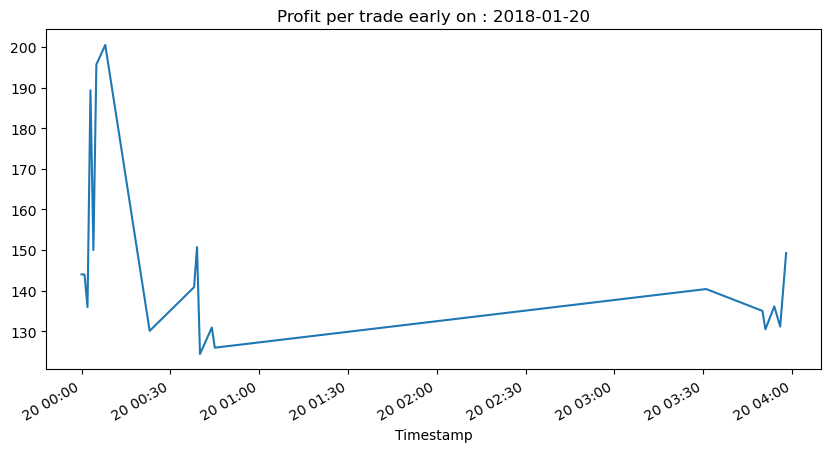

In [180]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5), title=f"Profit per trade early on : {early_date}");

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [182]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(f"The otential arbitrage profits on {early_date} are:")
print(profit_per_trade_early.sum())
print("")
print(f"The otential arbitrage profits on {middle_date} are:")
print(profit_per_trade_middle.sum())
print("")
print(f"The otential arbitrage profits on {late_date} are:")
print(profit_per_trade_late.sum())

The otential arbitrage profits on 2018-01-20 are:
2784.540000000001

The otential arbitrage profits on 2018-02-23 are:
0.0

The otential arbitrage profits on 2018-03-29 are:
0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [183]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

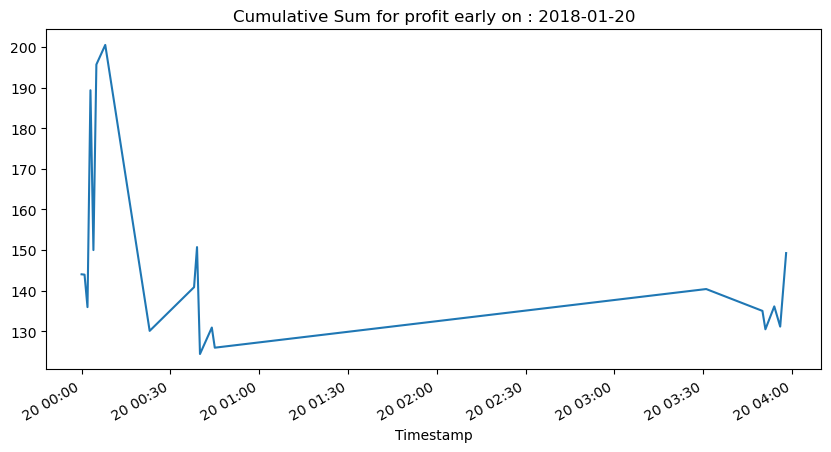

In [184]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5), title=f"Cumulative Sum for profit early on : {early_date}");

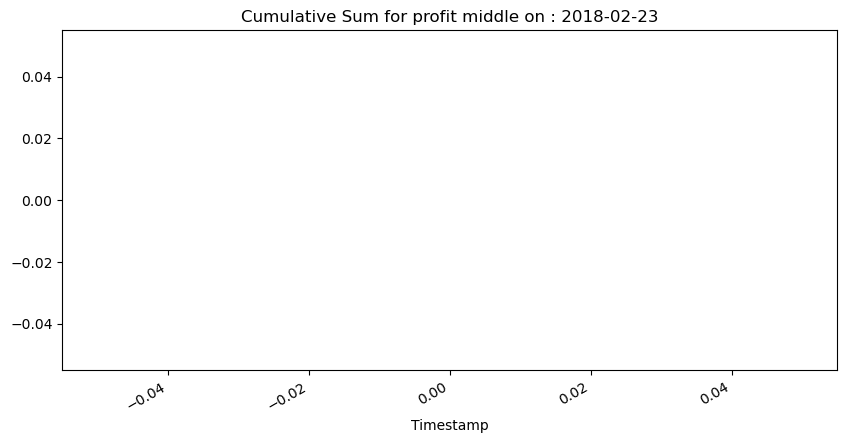

In [185]:
# Plot the cumulative sum of profits for the profit for middle date per trade DataFrame 
profit_per_trade_middle.plot(figsize=(10,5), title=f"Cumulative Sum for profit middle on : {middle_date}");

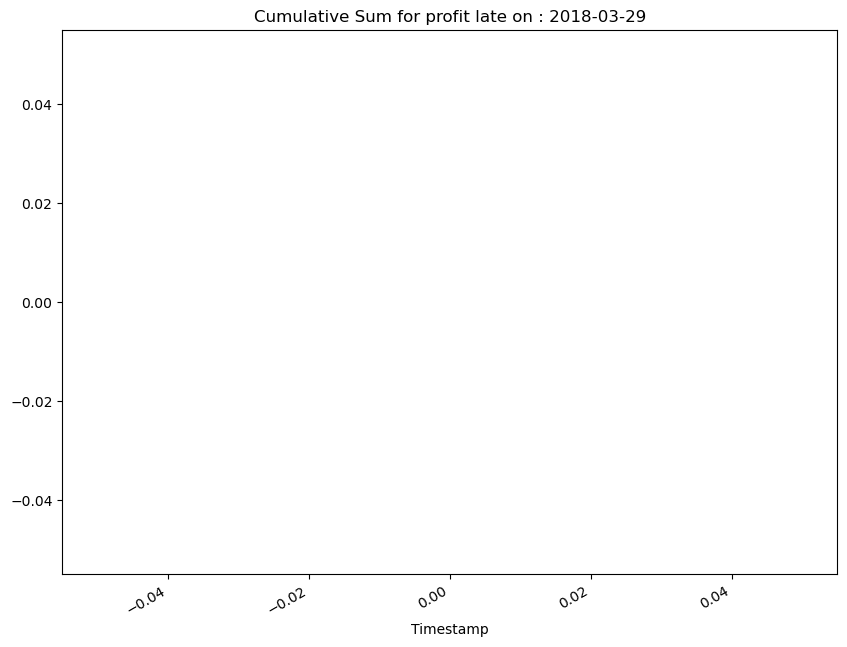

In [186]:
# Plot the cumulative sum of profits for the profit for late date per trade DataFrame 
profit_per_trade_late.plot(figsize=(10,8), title=f"Cumulative Sum for profit late on : {late_date}");

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** It appears that there were more abitrage opportunities early on, but the opportunities phased out as time went on.  This is could be caused by more arbitrage participants entering trades as time went on or other industry factors that reduced costs and profitability.